# Golden Cross and Death Cross

https://www.investopedia.com/terms/g/goldencross.asp

https://www.investopedia.com/terms/d/deathcross.asp

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

import yfinance as yf
yf.pdr_override()

In [2]:
start = '2020-01-01'
end = '2023-01-01'

symbol = '^nsei'

df = yf.download(symbol, start=start, end=end)

[*********************100%***********************]  1 of 1 completed


In [3]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-01 00:00:00+05:30,12202.150391,12222.200195,12165.299805,12182.500000,12182.500000,304100
2020-01-02 00:00:00+05:30,12198.549805,12289.900391,12195.250000,12282.200195,12282.200195,407700
2020-01-03 00:00:00+05:30,12261.099609,12265.599609,12191.349609,12226.650391,12226.650391,428800
2020-01-06 00:00:00+05:30,12170.599609,12179.099609,11974.200195,11993.049805,11993.049805,396500
2020-01-07 00:00:00+05:30,12079.099609,12152.150391,12005.349609,12052.950195,12052.950195,447800


In [4]:
df['% Change'] = df['Adj Close'].pct_change() # pct_change : percent profit rate
df.head()

,Open,High,Low,Close,Adj Close,Volume,% Change
Date,,,,,,,
2020-01-01 00:00:00+05:30,12202.150391,12222.200195,12165.299805,12182.500000,12182.500000,304100,NaN
2020-01-02 00:00:00+05:30,12198.549805,12289.900391,12195.250000,12282.200195,12282.200195,407700,0.008184
2020-01-03 00:00:00+05:30,12261.099609,12265.599609,12191.349609,12226.650391,12226.650391,428800,-0.004523
2020-01-06 00:00:00+05:30,12170.599609,12179.099609,11974.200195,11993.049805,11993.049805,396500,-0.019106
2020-01-07 00:00:00+05:30,12079.099609,12152.150391,12005.349609,12052.950195,12052.950195,447800,0.004995


In [5]:
df['P_AdjClose'] = df['Adj Close'].shift(1) # P_Adj Close : previous Close

In [6]:
df['L_Profit'] = np.log(df['Adj Close'] / df['P_AdjClose']) # L_Profit : Log Profit Rate

In [7]:
df['MA_50'] = df['Adj Close'].rolling(center=False, window=50).mean()
df['MA_200'] = df['Adj Close'].rolling(center=False, window=200).mean()
df['diff'] = df['MA_50'] - df['MA_200']

df = df[['Volume', 'Adj Close', 'MA_50', 'MA_200', 'diff']]
df.head(20)

,Volume,Adj Close,MA_50,MA_200,diff
Date,,,,,
2020-01-01 00:00:00+05:30,304100,12182.500000,NaN,NaN,NaN
2020-01-02 00:00:00+05:30,407700,12282.200195,NaN,NaN,NaN
2020-01-03 00:00:00+05:30,428800,12226.650391,NaN,NaN,NaN
2020-01-06 00:00:00+05:30,396500,11993.049805,NaN,NaN,NaN
2020-01-07 00:00:00+05:30,447800,12052.950195,NaN,NaN,NaN
2020-01-08 00:00:00+05:30,446000,12025.349609,NaN,NaN,NaN
2020-01-09 00:00:00+05:30,477500,12215.900391,NaN,NaN,NaN
2020-01-10 00:00:00+05:30,660600,12256.799805,NaN,NaN,NaN
2020-01-13 00:00:00+05:30,501000,12329.549805,NaN,NaN,NaN


In [8]:
prev_key = prev_val = 0

for key, val in df['diff'].iteritems():
  if val == 0:
    continue
  if val * prev_val < 0 and val > prev_val:
    print('[Golden]', key, val, df['Adj Close'][key])
  if val * prev_val < 0 and val < prev_val:
    print('[Death]', key, val, df['Adj Close'][key])
  prev_key, prev_val = key, val

[Death] 2022-04-18 00:00:00+05:30 -7.338173828124127 17173.650390625
[Golden] 2022-09-09 00:00:00+05:30 15.37694824218488 17833.349609375


### 50-day Moving Average goes 'under' 200-day Moving Average is a "Death Cross."
### 50-day Moving Average goes 'over' 200-day Moving Average is a "Golden Cross."

<Axes: xlabel='Date'>

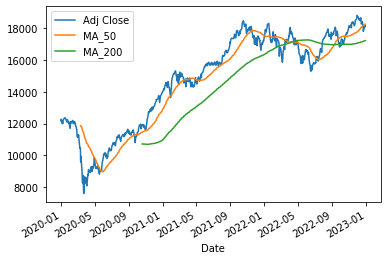

In [9]:
df[['Adj Close', 'MA_50', 'MA_200']]['2018-08':].plot()

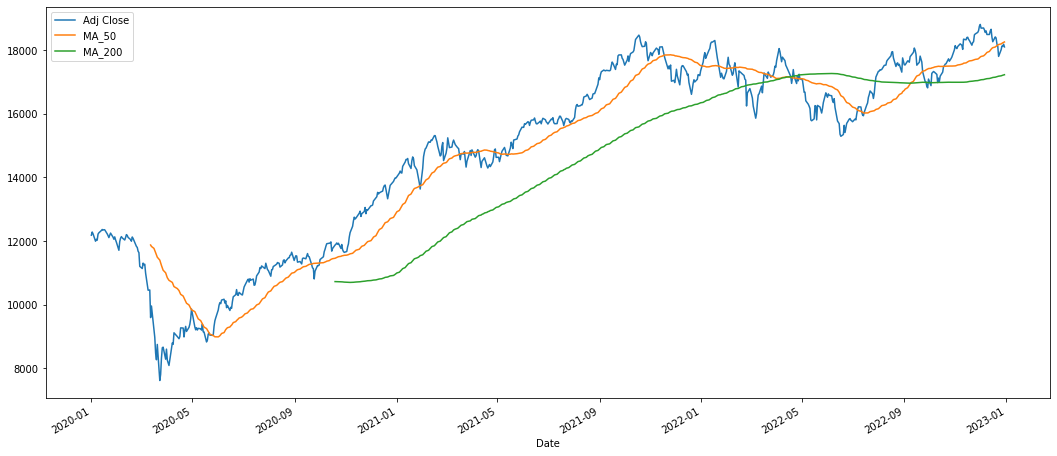

In [10]:
ax = df[['Adj Close', 'MA_50', 'MA_200']].plot(figsize=(18, 8))

prev_key = prev_val = 0

for key, val in df['diff'].iteritems():
  if val == 0:
    continue
    
    if val * prev_val < 0 and val > prev_val:
        ax.annotate('Golden', xy=(key, df['MA_200'][key]), xytext=(10,-30), 
                    textcoords='offset points', arrowprops=dict(arrowstyle='-|>'))
    elif val * prev_val < 0 and val < prev_val:
        ax.annotate('Death', xy=(key, df['MA_200'][key]), xytext=(10,30), 
                    textcoords='offset points', arrowprops=dict(arrowstyle='-|>'))
    
    prev_key, prev_val = key, val

## Plot Multi-colors of one line

In [11]:
df['Label'] = np.where(df['MA_50'] > df['MA_200'], 1, -1)

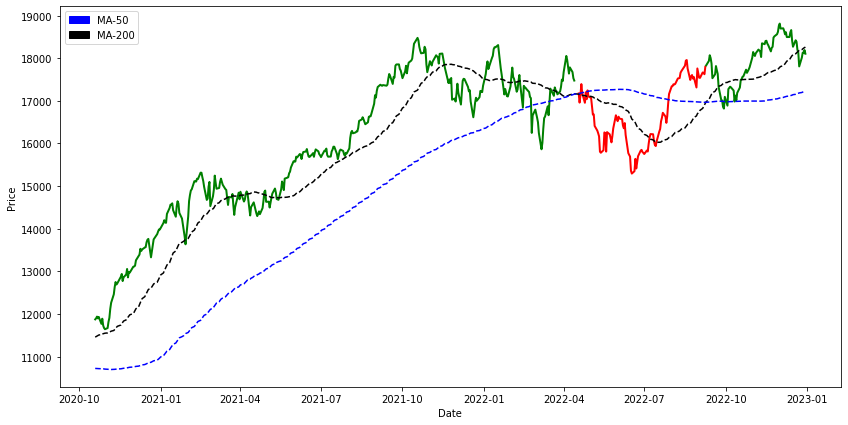

In [12]:
import matplotlib.patches as mpatches

df = df.dropna(axis=0, how='any')

fig, ax = plt.subplots(figsize=(14,7))

def plot_colors(group):
    global ax
    color = 'r' if (group['Label'] < 0).all() else 'g'
    lw = 2.0
    ax.plot(group.index, group['Adj Close'], c=color, linewidth=lw)

df.groupby((df['Label'].shift() * df['Label'] < 0).cumsum()).apply(plot_colors)

ax.plot(df.index, df['MA_50'], 'k--', label='MA-50')
ax.plot(df.index, df['MA_200'], 'b--', label='MA-200')
ax.set_ylabel('Price')
ax.set_xlabel('Date')
ma50 = mpatches.Patch(color='blue', label='MA-50')
ma200 = mpatches.Patch(color='black', label='MA-200')
ax.legend(handles=[ma50,ma200])

## Plot Intersection Points

In [13]:
short_term = 50
long_term = 200

signals = pd.DataFrame(index=df.index)
signals['position'] = 0.0

signals['Short_MA'] = df['Adj Close'].rolling(window=short_term, center=False).mean()
signals['Long_MA'] = df['Adj Close'].rolling(window=long_term, center=False).mean()

signals['position'][short_term:] = np.where(signals['Short_MA'][short_term:] 
                                            > signals['Long_MA'][short_term:], 1.0, 0.0)   

signals['intersection'] = signals['position'].diff()

In [14]:
print(signals)

                           position      Short_MA       Long_MA  intersection
Date                                                                         
2020-10-19 00:00:00+05:30       0.0           NaN           NaN           NaN
2020-10-20 00:00:00+05:30       0.0           NaN           NaN           0.0
2020-10-21 00:00:00+05:30       0.0           NaN           NaN           0.0
2020-10-22 00:00:00+05:30       0.0           NaN           NaN           0.0
2020-10-23 00:00:00+05:30       0.0           NaN           NaN           0.0
...                             ...           ...           ...           ...
2022-12-26 00:00:00+05:30       1.0  18200.374961  17195.859521           0.0
2022-12-27 00:00:00+05:30       1.0  18219.306992  17206.453774           0.0
2022-12-28 00:00:00+05:30       1.0  18235.520977  17215.339526           0.0
2022-12-29 00:00:00+05:30       1.0  18249.601992  17223.320024           0.0
2022-12-30 00:00:00+05:30       1.0  18261.463008  17230.694282 

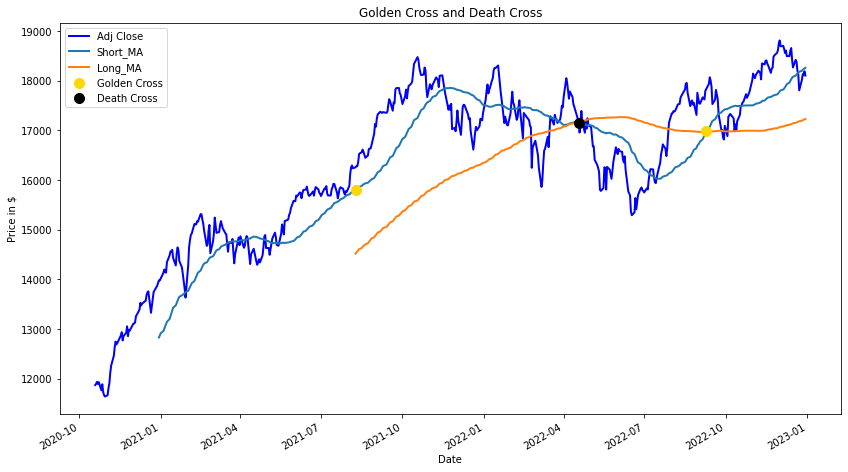

In [15]:
fig = plt.figure(figsize=(14,8))

# Add a subplot and label for y-axis
ax = fig.add_subplot(111,  ylabel='Price in $')

# Plot the Adj Close price
df['Adj Close'].plot(ax=ax, color='b', lw=2.)

# Plot the short and long moving averages
signals[['Short_MA', 'Long_MA']].plot(ax=ax, lw=2.)

# Plot the Signal of Golden Cross
ax.plot(signals.loc[signals.intersection == 1.0].index, 
         signals.Short_MA[signals.intersection == 1.0],
         'o', markersize=10, color='gold', label='Golden Cross')
         
# Plot the Signal of Death Cross
ax.plot(signals.loc[signals.intersection == -1.0].index, 
         signals.Short_MA[signals.intersection == -1.0],
         'o', markersize=10, color='black', label='Death Cross')

ax.set_title('Golden Cross and Death Cross')
ax.legend(loc='best')
         
# Show the plot
plt.show()